Importando as coisas necessárias

In [15]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

Abrindo o dataset

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Analisando a estrutura do dataset

In [17]:
# Checando os tensores
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [18]:
# Verificando as etiquetas únicas
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [19]:
# Criando a lista das etiquetas
class_names = ['avião', 'carro', 'pássaro', 'gato', 'veado',
               'cachorro', 'sapo', 'cavalo', 'barco', 'caminhão']

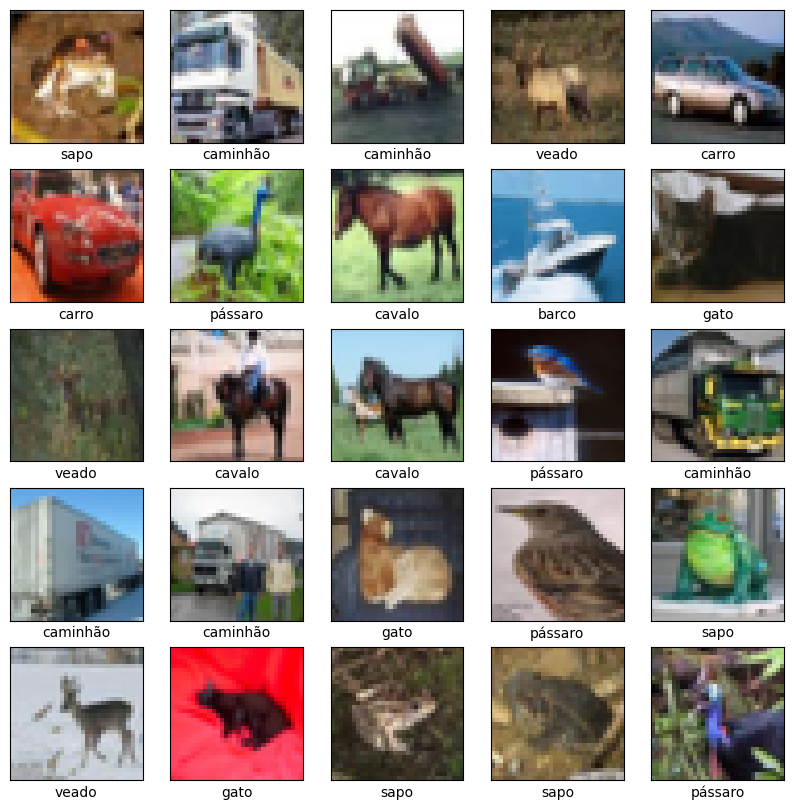

In [20]:
# Mostrando alguns dados do dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

Processamento dos dados

In [21]:
# Convertendo os pixels para float
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalizando as imagens
train_images = train_images / 255
test_images = test_images / 255

# Codificação one-hot das etiquetas
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

Criando o modelo

In [22]:
# Criando um modelo sequência e adicionando camadas nele

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Mostrando o resumo do modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

Compilando o modelo

In [23]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Treinando o modelo

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
136/391 [=========>....................] - ETA: 4:24 - loss: 2.3270 - accuracy: 0.2772

Visualizando e avaliando os resultados

Text(0.5, 1.0, 'Loss Curves')

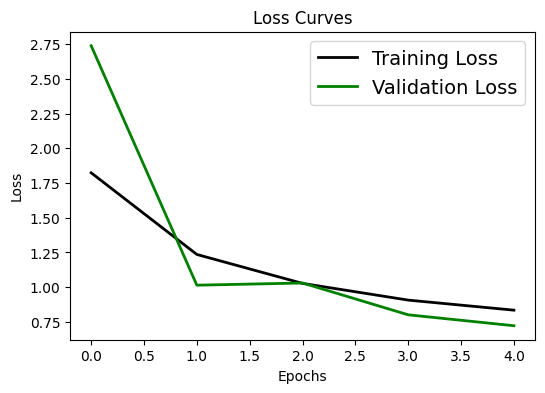

In [11]:
# Curva de perda
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

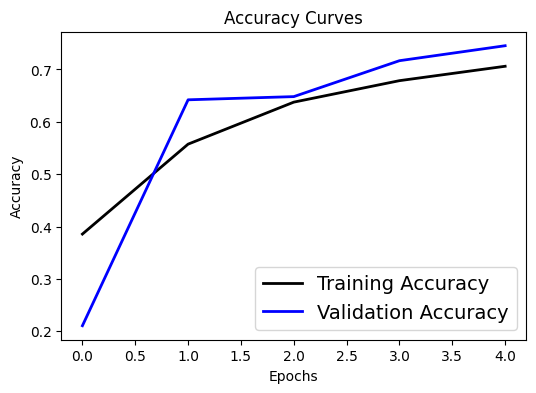

In [12]:
# Curva de acurácia
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

Vendo se o modelo treinou direitinho

In [13]:
# Fazendo as previsões
pred = model.predict(test_images)
print(pred)

# Convertendo as previsões nos índices das etiquetas
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 26s 81ms/step
[[5.2662997e-04 1.9689596e-04 4.5547592e-03 ... 5.3858885e-04
  9.9258020e-04 8.7176370e-05]
 [7.8057317e-04 9.3021467e-03 8.2743907e-07 ... 2.2092318e-07
  9.8980808e-01 1.0582543e-04]
 [3.8340025e-02 3.6754612e-02 6.2050537e-04 ... 1.5263833e-04
  9.2062050e-01 3.0253909e-03]
 ...
 [1.9753937e-04 1.0668229e-05 1.2559416e-02 ... 1.8082453e-02
  2.4813249e-05 3.3723660e-05]
 [1.8376537e-01 2.6304415e-01 1.5234418e-01 ... 1.2933405e-02
  9.8838117e-03 2.3577213e-03]
 [1.8316587e-06 5.7735583e-06 5.5716820e-05 ... 9.9687630e-01
  3.1522211e-07 3.8426310e-06]]
[3 8 8 ... 5 1 7]


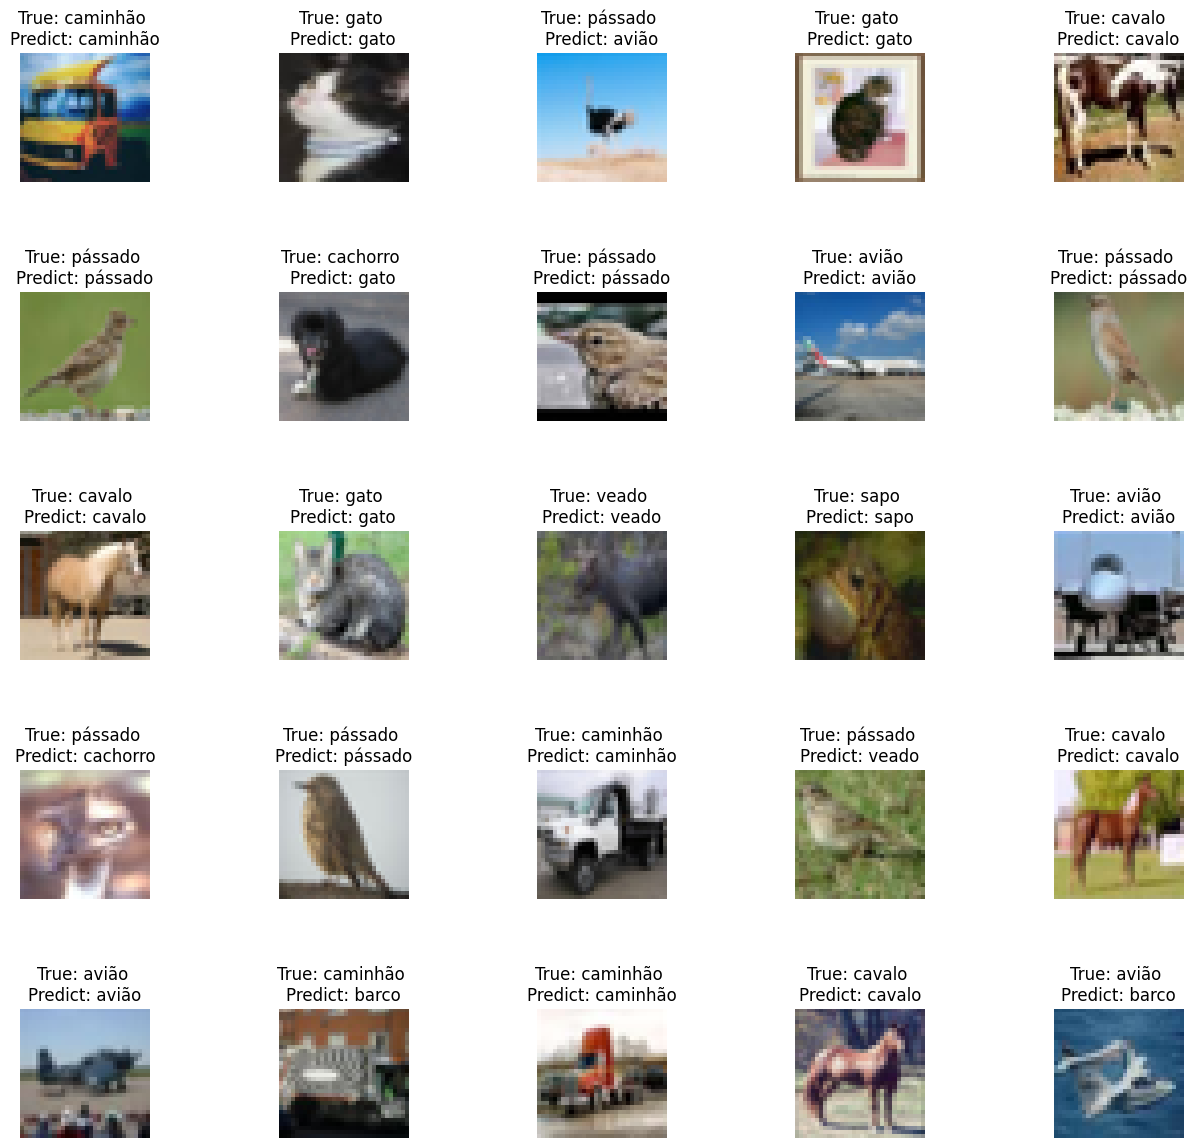

In [14]:
# Mostrando o verdadeiro vs. Resultado previsto

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    random_num = np.random.choice(len(test_images))
    axes[i].imshow(test_images[random_num])
    axes[i].set_title("Correto: %s \nPrevisto: %s" % (class_names[np.argmax(test_labels[random_num])], class_names[pred_classes[random_num]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)